In [148]:
import numpy as np
import requests
import csv
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
sys.path.append('/home/fabian/project_one/update/')
import util
%load_ext autoreload
%autoreload 2
from shorts import ShortsUpdater

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
x = pd.read_csv('/home/fabian/project_one/data/shorts/shorts_list.csv',decimal=",")

print x.head(5)

comp = pd.read_csv('/home/fabian/project_one/data/company_lists/full_list.csv',index_col='Unnamed: 0')
print comp.loc[comp['Y'] == "DE0007664005"]

             Positionsinhaber                          Emittent          ISIN  \
0  Bridgewater Associates, LP  DEUTSCHE BANK AKTIENGESELLSCHAFT  DE0005140008   
1  Bridgewater Associates, LP                  Deutsche Post AG  DE0005552004   
2  Bridgewater Associates, LP               Deutsche Telekom AG  DE0005557508   
3             AKO Capital LLP           Dürr Aktiengesellschaft  DE0005565204   
4            AHL Partners LLP                         Evotec AG  DE0005664809   

   Position       Datum  
0      0.81  2018-02-08  
1      0.70  2018-02-08  
2      0.61  2018-02-08  
3      1.00  2018-02-08  
4      1.36  2018-02-08  
Empty DataFrame
Columns: [Name, URL, ISIN, WKN, SymbolFinanzen.net, Country, Yahoo Ticker, Yahoo online]
Index: []


In [90]:
ob = UpdateShorts(PathData='/home/fabian/project_one/data/')
ob.update_from_file()

#isin = x['ISIN'].tolist()
#print len(list(set(isin)))

Label found for ISIN CEC.DE
ISIN DE0005558662  for stock:  Global PVQ SE  not found in data base
ISIN DE0005215107  for stock:  Clere AG  not found in data base
ISIN DE000A1K0300  for stock:  euromicron Aktiengesellschaft communication & control technology  not found in data base
ISIN DE0008032004  for stock:  COMMERZBANK Aktiengesellschaft - Rechtsabteilung-  not found in data base
Label found for ISIN SIX2.DE
ISIN DE000A1PHBB5  for stock:  R. Stahl Aktiengesellschaft  not found in data base
Label found for ISIN KGX.F
ISIN DE0007203705  for stock:  SNP Schneider-Neureither & Partner AG  not found in data base
ISIN US00771V1089  for stock:  Aerie Pharmaceuticals Inc  not found in data base
ISIN DE0006205701  for stock:  IVG Immobilien AG  not found in data base
ISIN NL0000240000  for stock:  Qiagen NV  not found in data base
ISIN CA26154A1066  for stock:  DREAM GLOBAL REIT  not found in data base
ISIN US4532041096  for stock:  IMPINJ, Inc.  not found in data base
ISIN DE0007664005  for

TypeError: to_pickle() takes at least 2 arguments (1 given)

In [50]:

test =  x.loc[x['ISIN'] == 'DE0005664809']

print test.head(10)[['Positionsinhaber','Position','Datum']]
owners = list(set(test['Positionsinhaber'].tolist()))

#print owners

one = test.loc[test['Positionsinhaber'] == owners[0]]
two = test.loc[test['Positionsinhaber'] == owners[1]]
#print one

print "\n"
#print two
amount = pd.DataFrame(columns=['Date','position'])

amount['Date'] = pd.date_range(x.tail(1)['Datum'].values[0],x.head(1)['Datum'].values[0])

amount['position'] = 0
for owner in owners:
    tmp = test.loc[test['Positionsinhaber'] == owner]
    
    for i in range(1,len(tmp)+1):
        if i == len(tmp):
            amount.loc[amount['Date'] >= tmp['Datum'].tail(i).values[0],'position'] += tmp.tail(i)['Position'].values[0]  
        else:
            amount.loc[(amount['Date'] >= tmp['Datum'].tail(i).values[0]) &(amount['Date'] < tmp['Datum'].tail(i+1).values[0]),'position'] += tmp.tail(i)['Position'].values[0]

print amount.loc[amount['Date']>'2018-1-1'].tail(5)

                         Positionsinhaber  Position       Datum
4                        AHL Partners LLP      1.36  2018-02-08
33                      Marshall Wace LLP      0.83  2018-02-07
34                        WorldQuant, LLC      0.97  2018-02-07
64                       AHL Partners LLP      1.44  2018-02-06
65   BlueMountain Capital Management, LLC      0.78  2018-02-06
125                       WorldQuant, LLC      1.09  2018-02-01
142                     Marshall Wace LLP      0.94  2018-01-31
168                       WorldQuant, LLC      1.17  2018-01-30
188  BlueMountain Capital Management, LLC      0.86  2018-01-29
207                      AHL Partners LLP      1.58  2018-01-26


           Date  position
5429 2018-02-04     11.29
5430 2018-02-05     11.29
5431 2018-02-06     11.07
5432 2018-02-07     10.84
5433 2018-02-08     10.76


['Date', 'CEC.DE', 'SIX2.DE', 'KGX.F', 'WDI.F', 'FNTN.DE', 'DRI.DE', 'RWE.DE', 'VOS.DE', 'SDF.DE', 'DBK.DE', 'EVK.F', 'HDD.DE', 'RHM.DE', 'UN01.DE', 'SNH.DE', 'SAP.DE', 'MTX.DE', 'UTDI.DE', 'LHA.DE', 'BOSS.DE', 'BDT.DE', 'GXI.DE', 'BAYN.DE', 'EVT.DE', 'WCH.DE', 'HOT.DE', 'SGL.DE', 'GMM.DE', 'COK.DE', 'BVB.DE', 'KRN.DE', 'BIO3.DE', 'SZU.DE', 'SAZ.DE', 'MRK.DE', 'SPR.DE', 'VNA.DE', 'MDG1.DE', 'FIE.F', 'AIXA.DE', 'SIE.DE', 'DRW3.DE', 'CAP.DE', 'GFT.DE', 'ZIL2.F', 'NDX1.DE', 'ADV.DE', 'PSM.DE', 'ARL.DE', 'SKB.DE', 'FRE.DE', 'SY1.DE', 'HEI.DE', 'ALV.DE', 'B4B.F', 'DEZ.DE', 'ZO1.DE', 'MUV2.DE', 'TLG.DE', 'JUN3.DE', 'TEG.DE', 'PBB.DE', 'TLX.DE', 'SRT3.DE', 'S92.F', 'INH.DE', 'LIN.DE', 'LXS.DE', 'FRA.DE', 'FPE3.DE', 'KCO.DE', 'RIB.DE', 'ADL.F', 'NOEJ.DE', 'LBTYA', 'BAS.DE', 'DAI.DE', 'AM3D.DE', 'NEM.DE', 'MOR.DE', 'GIL.DE', 'VT9.DE', 'PFV.DE', 'G1A.DE', 'DUE.DE', 'VOW3.DE', 'DEQ.DE', 'AOX.DE', 'GBF.DE', 'IFX.DE', 'SANT.DE', 'DLG.DE', 'P1Z.DE', 'WIN.DE', 'SAX.F', '1COV.DE', 'OSR.DE', 'QIA.DE', 

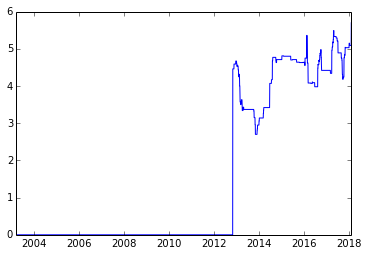

In [135]:
data = pd.read_pickle('/home/fabian/project_one/data/shorts/list.p')
print data.columns.tolist()
plt.plot(data['Date'],data['WCH.DE'])
plt.show()

In [3]:
url = 'https://www.bundesanzeiger.de/'

s = requests.Session()


r = s.get(url)
soup = BeautifulSoup(r.content, 'html.parser')

for link in list(soup.find_all('a')):
    if "Leerverkaufspositionen" in str(link):
        
        string = str(link.get('href'))
        start=  util.find_str(string,"session.sessionid",return_ind='start')
        end = util.find_str(string[start:],"&",return_ind='end')
        seassionid= string[start:start+end-2]
        
        
        new ="https://www.bundesanzeiger.de"+link.get('href')
        print new
        r1 = s.get(new)



https://www.bundesanzeiger.de/ebanzwww/wexsservlet?page.navid=to_nlp_start&session.sessionid=55fac717318ccbeac4f630e900b297f4&global_data.designmode=eb


In [71]:

l1 = list(soup.findAll("td", {"class": "first"}))
l2 = list(soup.findAll("td", {"class": "col_nlp_position"}))
#print soup.findAll("td", {"class":"col_nlp_position"})

print l2[0].get_text()

0,81 %


In [100]:
soup =BeautifulSoup(r1.content,'html.parser')
l = soup.findAll("table", {"class": "result"})[0]
names = l.findAll("td",{"class":"first"})
pos = l.findAll("td",{"class":"col_nlp_position"})
date = l.findAll("td",{"class":"last"})
comp_data = l.findAll("td",{"class":None})


In [159]:
tmp = pd.DataFrame(columns=['Positionsinhaber','Emittent','ISIN','Position','Datum'],dtype=object)
for i in range(len(names)):

    tmp = tmp.append({'Positionsinhaber':names[i].get_text(),
     'Position':pos[i].get_text()[0:-2],
     'Datum':date[i].get_text(),
     'ISIN':comp_data[i*2+1].get_text(),
     'Emittent':comp_data[i*2].get_text()[0:util.find_str(comp_data[i*2].get_text(),"Historie",return_ind="start")-2]},ignore_index=True)

d = pd.read_csv('/home/fabian/project_one/data/shorts/shorts_list.csv')[5:]

print d.head(5)
print tmp.head(5)

                         Positionsinhaber                       Emittent  \
5  Millennium International Management LP  Salzgitter Aktiengesellschaft   
6  Millennium International Management LP                     Aurubis AG   
7                        AHL Partners LLP         RWE Aktiengesellschaft   
8              Bridgewater Associates, LP                     Daimler AG   
9              Bridgewater Associates, LP                         SAP SE   

           ISIN Position       Datum  
5  DE0006202005     1,30  2018-02-08  
6  DE0006766504     0,91  2018-02-08  
7  DE0007037129     0,47  2018-02-08  
8  DE0007100000     0,84  2018-02-08  
9  DE0007164600     0,74  2018-02-08  
             Positionsinhaber                          Emittent          ISIN  \
0  Bridgewater Associates, LP  DEUTSCHE BANK AKTIENGESELLSCHAFT  DE0005140008   
1  Bridgewater Associates, LP                  Deutsche Post AG  DE0005552004   
2  Bridgewater Associates, LP               Deutsche Telekom AG  D

In [160]:
#print tmp.head(2)
print d.head(1).values[0]
print tmp.head(1).values[0]
#print tmp.columns
try:
    idx_in_tmp = np.where(util.find_mask(tmp,d.head(1).values[0],d.columns) ==True)[0][0]
    print idx_in_tmp
    if idx_in_tmp == 0:
        print "no new data to append"
    else:
        d = pd.concat([tmp[0:idx_in_tmp],d],ignore_index=True)
    print d.head(2)
except IndexError:
    print "more than 20 new entries found, download new list from bundesanzeiger.de"


['Millennium International Management LP' 'Salzgitter Aktiengesellschaft'
 'DE0006202005' '1,30' '2018-02-08']
[u'Bridgewater Associates, LP' u'DEUTSCHE BANK AKTIENGESELLSCHAFT'
 u'DE0005140008' u'0,81' u'2018-02-08']
5
             Positionsinhaber                          Emittent          ISIN  \
0  Bridgewater Associates, LP  DEUTSCHE BANK AKTIENGESELLSCHAFT  DE0005140008   
1  Bridgewater Associates, LP                  Deutsche Post AG  DE0005552004   

  Position       Datum  
0     0,81  2018-02-08  
1     0,70  2018-02-08  


In [176]:
ob = ShortsUpdater(PathData='/home/fabian/project_one/data/')
ob.update_from_web()

2 new found short positions saved
